# Computational Exercise 2: Visualizing features of breast cancer samples

---
In this assignment, we'll be loading, describing, and visualizing the [Wisconsin Breast Cancer Diagnosis Dataset][1]

This is a well-known dataset that has been explored and discussed quite a bit:
- [discussion and examples on kaggle][2]
- [Medium article similar to this assignment][3]

Goals are as follows:

- Become more comfortable with the Jupyter notebook format
- Explore common data exploration and visualization techniques
- Learn/review initial steps required to prepare a dataset for model development
- Consider which techniques are most useful for specific healthcare datasets

We'll begin by importing a few required libraries using an `import` statement. Each of them extends the basic functionality of Python. By importing `as X` (e.g. `as np`), we can shorten subsequent calls to the library in our code.

- `numpy` for efficient math operations
- `pandas` for dataframes and dataframe operations
- `matplotlib` for visualization/plotting
- `sklearn` will give us a convenient way to load our dataset. In later assignments, we'll also be using this library to define models, train them, and evaluate their performance.

**Note** that there are many libraries for visualization and plotting in Python. For this assignment, we'll go with the one that's *simplest* to use -- `matplotlib` -- rather than the one that gives us the *prettiest* figures (e.g. `seaborn`, `plotly`).

[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
[2]: https://www.kaggle.com/shubamsumbria/breast-cancer-prediction
[3]: https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We can now use `sklearn` to load the dataset we'll be working with. Typically you might load from `.csv` with `pd.read_csv()`, from `.xlsx` with `pd.read_excel()`, etc., but the result would be the same: you'd end up with a `pandas` dataframe. In this case, `sklearn` gives us a nice way to load this dataframe without having to find and download a `.csv` file on our own.

In [2]:
from sklearn.datasets import load_breast_cancer
df, y = load_breast_cancer(return_X_y=True, as_frame=True)
y = 1 - y # let's set benign to 0 and malignant to 1, in keeping with usual conventions

We now have two objects: a dataframe `df` of predictors, and a single *series* (i.e. column) `y` of the associated outcomes. In this dataset, the possible outcomes are *Malignant* versus *Benign*. Typically, the presence of a condition of interest is indicated with a 1, but the dataset we loaded does not follow this convention. In the above block, we've flipped the original labels so that as expected, *Malignant* is indicated with a 1, while *Benign* is indicated with a 0.

Let's use the `.head()` method of our `pandas` dataframe `df` to take a look at its first few rows. Since we have 30 features in total, `df` is too wide to fit on the page. Still, this initial step is helpful to give us an initial glimpse of the data and check that it's been imported correctly.

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now that we've seen our features, let's take a look at our outcomes. We can first use `.value_counts()` to count occurrences of distinct values in `y`:

In [4]:
y.value_counts()

0    357
1    212
Name: target, dtype: int64

## Exercise 2.1: Visualizing the label counts

These counts will be easier to appreciate if we use a bar plot. In the block below, use `pandas` and/or `matplotlib` to create a bar plot of the counts of malignant and benign cases in our dataset. Make sure the x-axis labels are *Benign* and *Malignant* rather than 0 and 1, and that the y-axis is labeled appropriately.

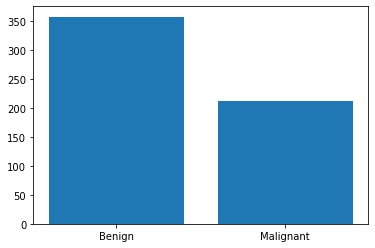

In [5]:
### ADD YOUR CODE BELOW ###

plt.bar(['Benign', 'Malignant'], y.value_counts())
plt.show()

Let's now take a look at some descriptive statistics for each of our 30 features. We can do this with the `.describe()` method provided by `pandas`. We'll also transpose the result with `.T` to make it more readable, is it would otherwise be too wide to fit on the page. Note that 25%, 50% (the median), and 75% define the quartiles, and the inter-quartile range may be calculated by subtracting the 25% value from the 75% value.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exercise 2.2: Standardizing the features

When developing a model, we often wish to standardize our numeric features such that their mean is zero and standard deviation is 1. In the code block below, create a new dataframe `df_standardized` in which each feature has been standardized in this way. Then, use `df_standardized.describe().T` to show that each feature does indeed have mean 0 and standard deviation 1.

In [7]:
### ADD YOUR CODE BELOW ###

df_standardized = (df - df.mean()) / df.std()
df_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,-1.311195e-16,1.0,-2.027864,-0.688779,-0.214893,0.468980,3.967796
mean texture,569.0,6.243785e-17,1.0,-2.227289,-0.725325,-0.104544,0.583662,4.647799
mean perimeter,569.0,-1.248757e-16,1.0,-1.982759,-0.691347,-0.235773,0.499238,3.972634
mean area,569.0,-2.185325e-16,1.0,-1.453164,-0.666609,-0.294927,0.363188,5.245913
mean smoothness,569.0,-8.366672e-16,1.0,-3.109349,-0.710338,-0.034860,0.635640,4.766717
mean compactness,569.0,1.998011e-16,1.0,-1.608721,-0.746429,-0.221745,0.493423,4.564409
mean concavity,569.0,3.746271e-17,1.0,-1.113893,-0.743094,-0.341939,0.525599,4.239858
mean concave points,569.0,-4.995028e-17,1.0,-1.260710,-0.737295,-0.397372,0.646366,3.924477
mean symmetry,569.0,1.748260e-16,1.0,-2.741705,-0.702621,-0.071564,0.530313,4.480808
mean fractal dimension,569.0,4.838933e-16,1.0,-1.818265,-0.722004,-0.178123,0.470569,4.906602


## Exercise 2.3: Checking for missing values

In addition to the descriptive statistics, we need to check how many missing values are present in each of the columns. We can do this with the `.isna()` method, which returns a new dataframe in which NA and non-NA values in `df` have been replaced with ones and zeroes, respectively. In the block below, use `df.isna()` to verify that no NA values are present in this dataset (HINT: you'll want to take the `.sum()` of `df.isna()` over each column).

In [8]:
### ADD YOUR CODE BELOW ###

df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

We're now ready to visualize our features! Let's use one of the most common and useful tools in all of data visualization -- the histogram -- to understand how our features are distributed and compare the distributions of benign versus malignant samples.

## Exercise 2.4: Visualizing the features

Choose one of the features in our dataset and use `matplotlib` and/or `pandas` to plot the distribution of this feature in (a) benign samples, and (b) malignant samples. To make it easier to compare and/or contrast the histograms, it may be helpful to overlay them (i.e., place them on the same plot), and to use the same scale and bin size for both groups.

A few hints:
- you can plot a histogram with `plt.hist()`, as shown in [this example](https://matplotlib.org/stable/gallery/statistics/hist.html)
- you can select benign and malignant samples only with `df[y == 0]` and `df[y == 1]`, respectively
- when overlaying two histograms, pass `alpha=.5` to `plt.hist()` to make each histogram partially transparent

Once you've created your plots, consider whether the feature you chose would be useful for discriminating between groups, and why. If it would be, consider what threshold you would use to distinguish between groups, as shown and discussed in our first lecture.

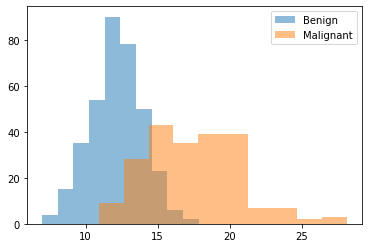

In [9]:
### ADD YOUR CODE BELOW ###

plt.hist(df[y == 0]['mean radius'], label='Benign', alpha=.5)
plt.hist(df[y == 1]['mean radius'], label='Malignant', alpha=.5)
plt.legend()
plt.show()

## Additional visualization: correlatation between features and outcome

We've now completed the required exercises, but the following additional visualizations may be useful.

Let's compute the (pearson) correlation between each feature and the outcomes `y` using the `.corrwith()` method, then plot the result as a bar graph. Together with grouped histograms like the one you created in Exercise 4, these plots provide some clues about the feasibility of predicting `y` based on the features in `df`.

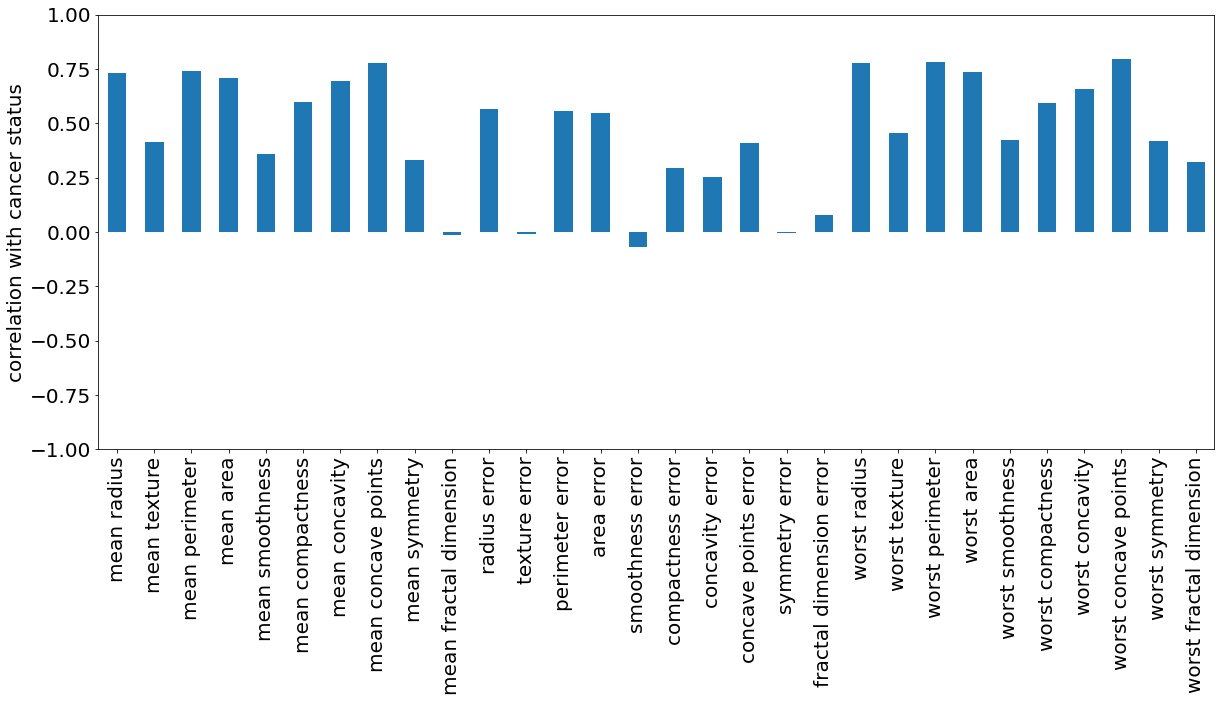

In [10]:
df.corrwith(y).plot(kind='bar', figsize=(20, 8), ylim=[-1, 1], fontsize=20)
plt.ylabel('correlation with cancer status', fontsize=20)
plt.show()

## Additional visualization: pairwise correlation between features

Along with the correlations between `y` and each of the features in `df`, we may be interested in correlations between pairs of features in `df`. Using the `.corr()` method, we can compute the correlation between all such pairs. The other key portion of the code below is `matplotlib`'s `.matshow()` method, which plots the correlation coefficients as a heatmap. This makes it easier to quickly identify which pairs are strongly versus weakly correlated. Using the `'RdBu'` color scheme we've selected, correlations close to 1 are dark blue, correlations close to -1 are dark red, and correlations close to zero are light/white colored.

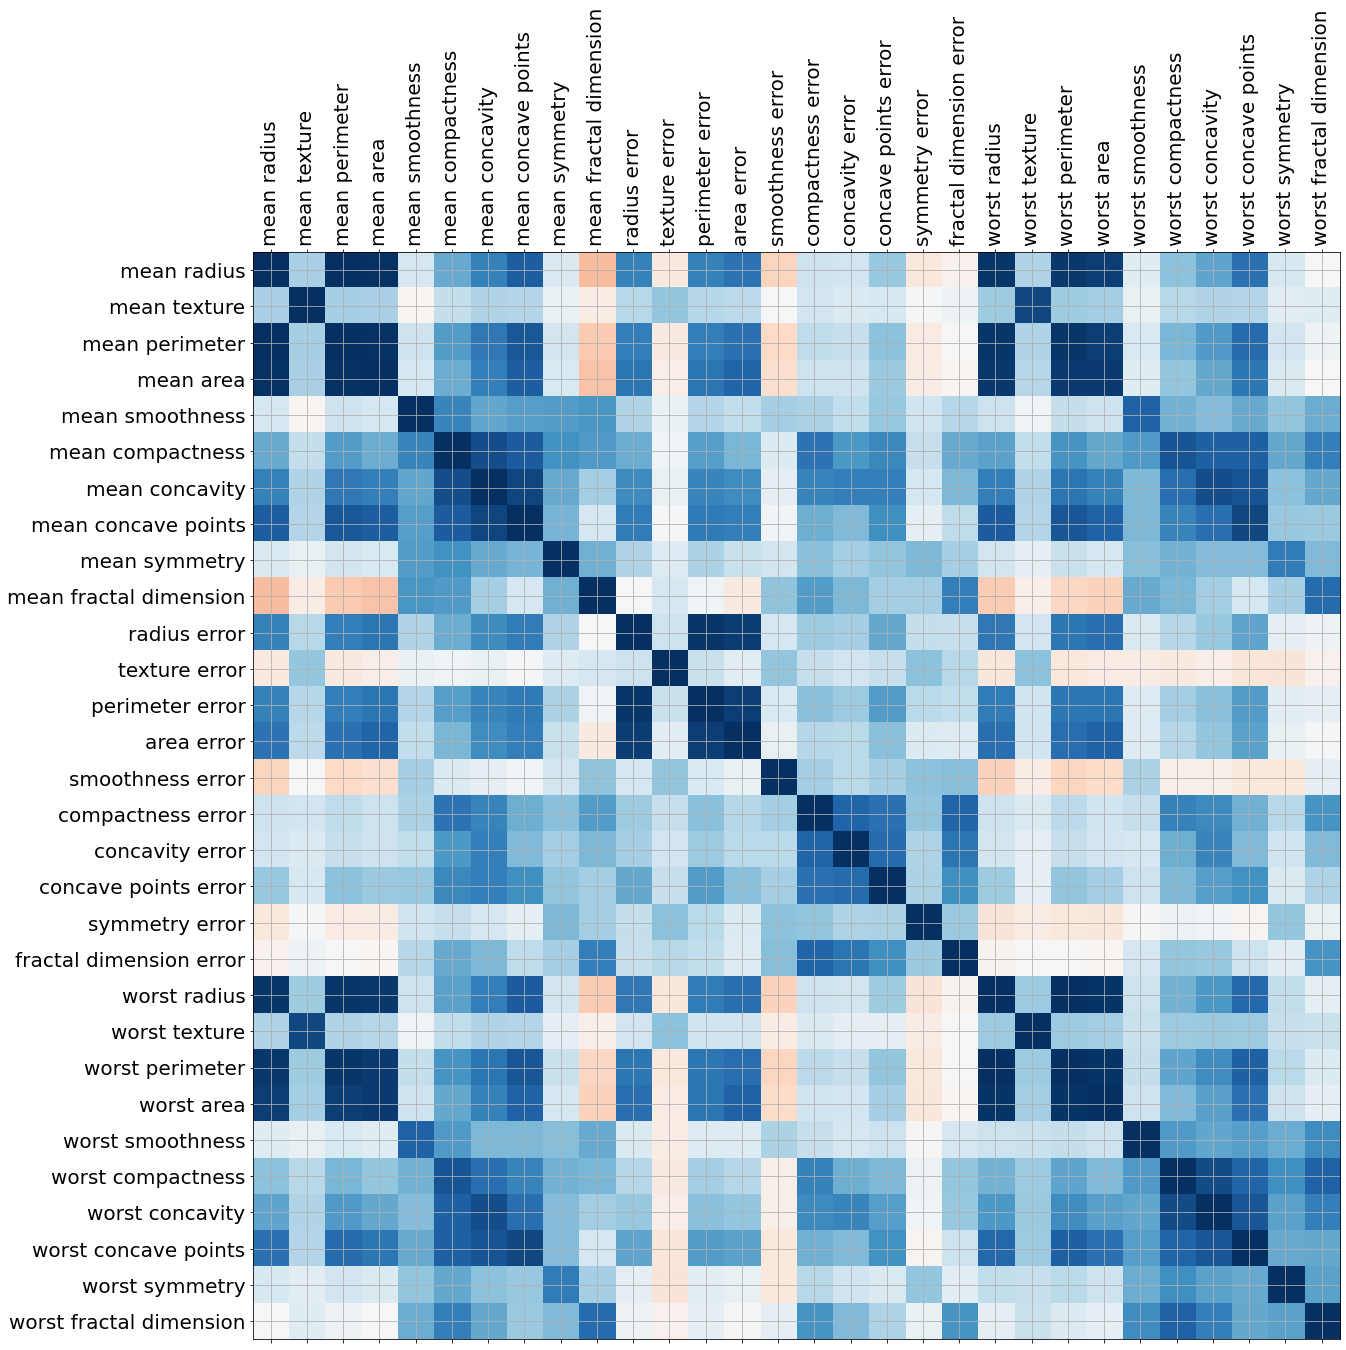

In [11]:
plt.figure(figsize=(20, 20))         # specify the size of the figure

plt.matshow(
    df.corr(),
    cmap='RdBu',                     # use the red-blue colormap to show negative (positive) values as red (blue)
    vmin=-1.,                        # specify that -1 is the minimum possible value so that -1 will be dark red
    vmax=1.,                         # specify that 1 is the maximum possible value so that 1 will be dark blue
    fignum=0                         # this forces .matshow() to plot on the figure we've already created
)

plt.grid(None)                       # turn off gridlines

plt.yticks(np.arange(len(df.columns)), df.columns, fontsize=20)                # show feature names as y-ticks
plt.xticks(np.arange(len(df.columns)), df.columns, fontsize=20, rotation=90)   # show feature names as x-ticks

plt.show()

### Once you've completed these exercises, please turn in the assignment as follows:

If you're using Anaconda on your local machine:
- download your notebook as html (see File > Download as > HTML (.html))
- submit the resulting file as your assignment
- if .html files are not accepted, .zip the file (i.e. place it in a .zip archive) and submit the .zip file instead

If you're using Google Colab:
- download your notebook as .ipynb (see File > Download > Download .ipynb)
- if you have nbconvert installed, convert it to .html; if not, leave is as .ipynb
- submit the resulting file as your assignment
- if this file is not accepted, .zip the file (i.e. place it in a .zip archive) and submit the .zip file instead